In [ ]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 8.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505221 sha256=4627d446cb8a1bea77dfcac2a6bf4ae69c408d5f7fbba4b4138f25ef088a0253
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


In [ ]:
!pip install scikit-surprise

In [ ]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate

In [ ]:
!pip install matplotlib seaborn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving All_Beauty_5.json.gz to All_Beauty_5.json.gz


In [ ]:
import pandas as pd

df = pd.read_json('All_Beauty_5.json.gz', lines=True)
df = df[['reviewerID', 'asin', 'overall']]
df.columns = ['userID', 'itemID', 'rating']
df.head()

,userID,itemID,rating
0,A3CIUOJXQ5VDQ2,B0000530HU,5
1,A3H7T87S984REU,B0000530HU,5
2,A3J034YH7UG4KT,B0000530HU,1
3,A2UEO5XR3598GI,B0000530HU,5
4,A3SFRT223XXWF7,B00006L9LC,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userID  5269 non-null   object
 1   itemID  5269 non-null   object
 2   rating  5269 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 123.6+ KB


In [ ]:
from surprise import Dataset, Reader

# Create a Reader to specify the rating scale (from 1 to 5 based on your dataset)
reader = Reader(rating_scale=(1, 5))

# Load the data into Surprise format
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

In [ ]:
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

# Split data into training and testing sets
trainset, testset = train_test_split(data, test_size=0.25)

# Initialize the SVD algorithm
model = SVD()

# Fit the model on the training data
model.fit(trainset)

# Make predictions on the testset
predictions = model.test(testset)

# Calculate the RMSE (Root Mean Square Error) to evaluate the model
print("RMSE:", accuracy.rmse(predictions))

RMSE: 0.5268
RMSE: 0.5268221338728435


In [ ]:
user_id = 'A3J034YH7UG4KT	'  # replace this with any user from your dataset

# Get all items the user has not rated yet
all_items = df['itemID'].unique()
rated_items = df[df['userID'] == user_id]['itemID'].values
unrated_items = [item for item in all_items if item not in rated_items]

# Predict ratings for the unrated items
predictions = [model.predict(user_id, item) for item in unrated_items]
predictions.sort(key=lambda x: x.est, reverse=True)

# Show top 5 recommendations
top_n = predictions[:5]
for pred in top_n:
    print(f"Recommend item {pred.iid} with predicted rating {pred.est:.2f}")

Recommend item B000FI4S1E with predicted rating 4.92
Recommend item B0009RF9DW with predicted rating 4.90
Recommend item B019LAI4HU with predicted rating 4.86
Recommend item B00AKP21KM with predicted rating 4.86
Recommend item B00IJHY54S with predicted rating 4.84


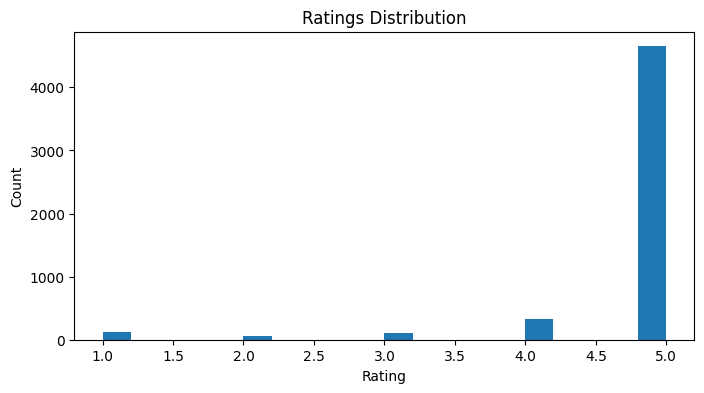

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
df['rating'].hist(bins=20)
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid()
plt.show()

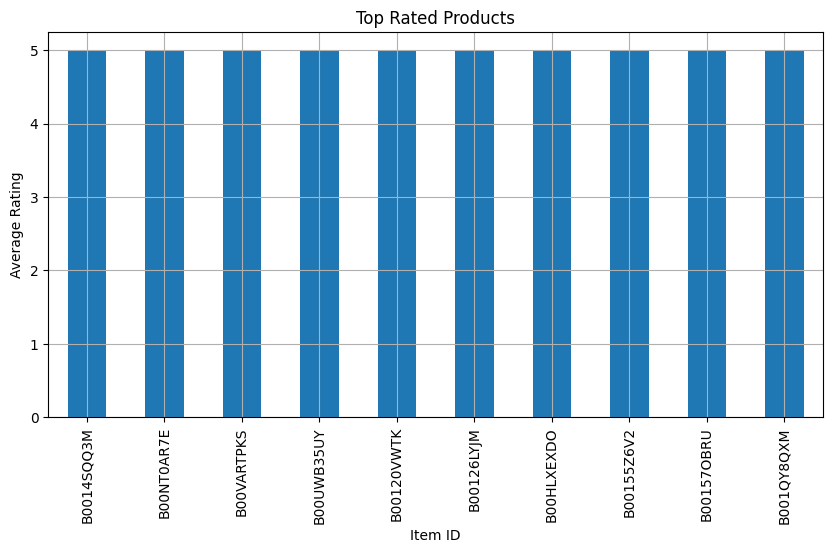

In [ ]:
top_rated = df.groupby('itemID')['rating'].mean().sort_values(ascending=False).head(10)
top_rated.plot(kind='bar', figsize=(10, 5), title='Top Rated Products')
plt.ylabel('Average Rating')
plt.xlabel('Item ID')
plt.grid()
plt.show()

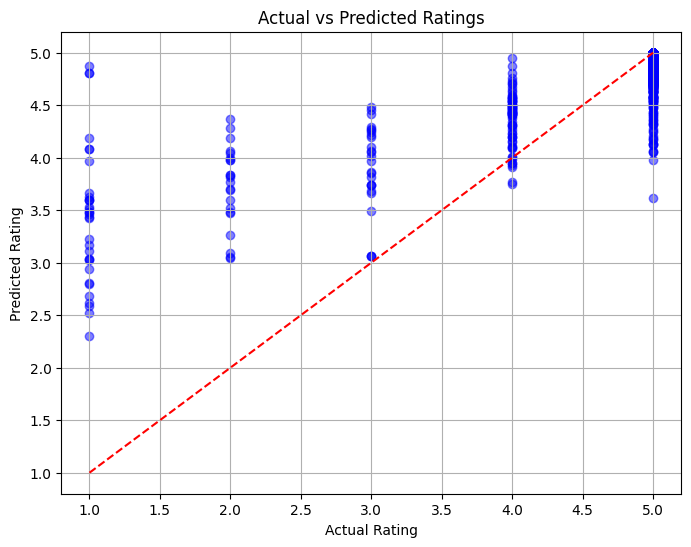

In [ ]:
# First, ensure predictions are made for the same testset user-item pairs
predictions = model.test(testset)

# Get the actual ratings (r_ui) from testset
actual_ratings = [true_rating for (_, _, true_rating) in testset]

# Get the predicted ratings from predictions
predicted_ratings = [pred.est for pred in predictions]

# Check if actual and predicted ratings are the same length
if len(actual_ratings) == len(predicted_ratings):
    # Scatter plot of actual vs predicted ratings
    # Add a diagonal line to the plot
     plt.figure(figsize=(8, 6))
     plt.scatter(actual_ratings, predicted_ratings, alpha=0.5, color='blue')
     plt.plot([min(actual_ratings), max(actual_ratings)], [min(actual_ratings), max(actual_ratings)], color='red', linestyle='--')
     plt.title('Actual vs Predicted Ratings')
     plt.xlabel('Actual Rating')
     plt.ylabel('Predicted Rating')
     plt.grid(True)
     plt.show()
else:
    print(f"Length mismatch: actual ratings length = {len(actual_ratings)}, predicted ratings length = {len(predicted_ratings)}")

In [ ]:
from surprise import KNNBasic, KNNWithZScore

ModuleNotFoundError: No module named 'surprise'

In [ ]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from surprise import GridSearchCV

ImportError: cannot import name 'GridSearchCV' from 'surprise' (/usr/local/lib/python3.11/dist-packages/surprise/__init__.py)

In [ ]:
!pip install -U scikit-surprise

In [ ]:
from surprise.model_selection import GridSearchCV

In [ ]:
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'k': [20, 40, 60],  # Number of neighbors
    'sim_options': {
        'name': ['cosine', 'msd'],  # Similarity measures
        'user_based': [True, False]  # User-based or item-based
    }
}

# Perform grid search
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search.fit(data)

# Get the best parameter combination
best_params = grid_search.best_params['rmse']
print("Best parameters:", best_params)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarit

In [ ]:
from surprise import KNNBasic
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import train_test_split

# Load your dataset (if not already done)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)

# Split data into training and test sets
trainset, testset = train_test_split(data, test_size=0.2)

# Get the best parameters from GridSearchCV
best_k = grid_search.best_params['rmse']['k']
best_sim_options = grid_search.best_params['rmse']['sim_options']

# Initialize and train the model with the best parameters
model = KNNBasic(k=best_k, sim_options=best_sim_options)
model.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
# Make predictions on the test set
predictions = model.test(testset)

# Evaluate the performance of the model
from surprise import accuracy

# Calculate RMSE (Root Mean Squared Error)
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

# Calculate MAE (Mean Absolute Error)
mae = accuracy.mae(predictions)
print(f"MAE: {mae}")

RMSE: 0.2649
RMSE: 0.2648597786805249
MAE:  0.0641
MAE: 0.06414952247056349


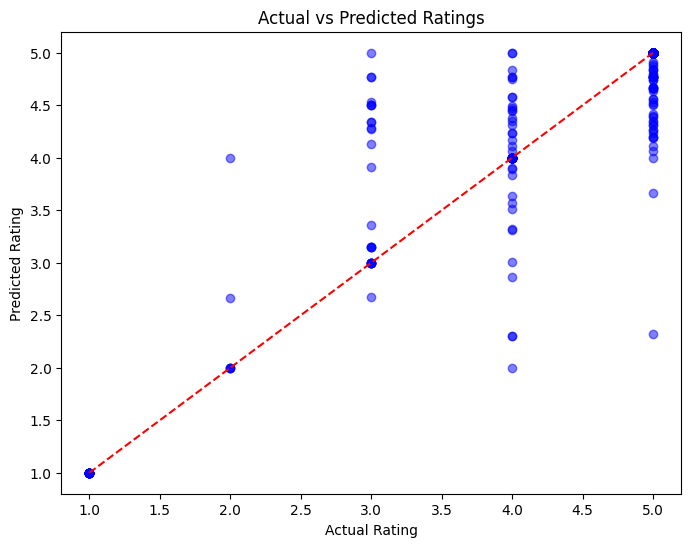

In [ ]:
import matplotlib.pyplot as plt

# Get actual ratings and predicted ratings
actual_ratings = [test[2] for test in predictions]  # actual ratings from the test set
predicted_ratings = [pred.est for pred in predictions]  # predicted ratings from the model

# Scatter plot of actual vs predicted ratings
plt.figure(figsize=(8, 6))
plt.scatter(actual_ratings, predicted_ratings, alpha=0.5, color='blue')
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.plot([1, 5], [1, 5], color='red', linestyle='--')  # diagonal line for perfect predictions
plt.show()

In [ ]:
from collections import defaultdict

# Define a function to get top N recommendations for a user
def get_top_n_recommendations(predictions, n=10):
    # Sort the predictions by estimated rating (higher rating = better recommendation)
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sort each user's predictions by estimated rating in descending order
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Get the top 10 recommendations for each user=
top_n = get_top_n_recommendations(predictions, n=10)

# Display the recommendations for a specific user (e.g., 'A3J034YH7UG4KT')
user_id = 'A3J034YH7UG4KT'
print(f"Top recommendations for {user_id}:")
for item, rating in top_n[user_id]:
    print(f"Item ID: {item}, Predicted Rating: {rating}")

Top recommendations for A3J034YH7UG4KT:
Item ID: B019809F9Y, Predicted Rating: 1


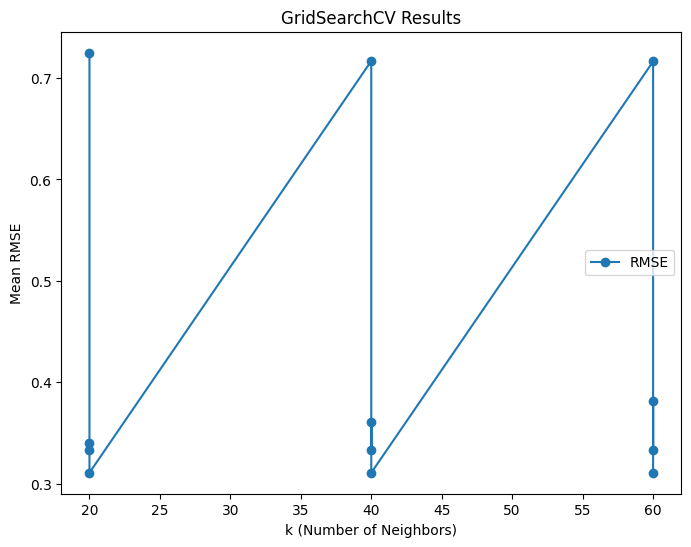

In [ ]:
# Plot the results of the grid search
results = pd.DataFrame(grid_search.cv_results)
plt.figure(figsize=(8, 6))
plt.plot(results['param_k'], results['mean_test_rmse'], label='RMSE', marker='o')
plt.title('GridSearchCV Results')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean RMSE')
plt.legend()
plt.show()